<a href="https://colab.research.google.com/github/asmaradhiah/PBI/blob/main/in-class-assignments/ica03/Data_Mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

< [How to Read and Represent Data](../ica02/How_to_Read_and_Represent_Data.ipynb) | Contents (TODO) | [Data Preprocessing and Visualization](../ica04/Data_Preprocessing_and_Visualization.ipynb) >

<a href="https://colab.research.google.com/github/stephenbaek/bigdata/blob/master/in-class-assignments/ica03/Data_Mining.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>

# Data Mining

Data mining is the practice of examining data sources in order to generate new information. People say [data is the new oil](https://www.economist.com/leaders/2017/05/06/the-worlds-most-valuable-resource-is-no-longer-oil-but-data) (* and also [otherwise](https://www.forbes.com/sites/bernardmarr/2018/03/05/heres-why-data-is-not-the-new-oil/#1b2106913aa9)...). So we can arrive at this ~~cheesy~~ analogy that data mining is like mining the oil.

Nonetheless, what we are going to do today in this notebook are threefold. First, we are going to see how to access a large collection of public data sets published on a website called, Kaggle. Second, we will get a feel of web crawling/scraping by extracting some living information on the web. Last but not the least, we are going to see how data APIs generally work.

## 1. Kaggle Datasets

In short, Kaggle is a sort of online community for data scientists, now owned by Google (as of 2017). The community allows its users (called Kagglers) to publish data sets, build models in a web-based data-science environment, enter data science challenge competitions, exchange ideas/codes, etc. Around the time Google acquired Kaggle, its user base passed 1,000,000 registered users, spanning 190+ countries, forming the largest and most diverse data science community in the world.

Especially for students of data science, it is an extremely useful source of materials, not just because of the gigantic amount of real-world data sets and data science problems, but also because of the source codes, ideas, etc. shared by other Kagglers. In this section, I'll show one of (many) ways to use Kaggle for your own project.


### 1.1. Getting Started

#### Sign up
Well, first off, you have to sign up (again, I'm not getting paid by Google for encouraging you to sign up :)). The sign up process is rather simple, so I won't explain here. Once the sign up process is complete, just go ahead and navigate what they have on the website. Especially, try to click `Competitions` menu on top, and see the list of competitions. Also, make sure to check out `Datasets` menu, where you can find tens of thousands of real-world data set for free. Lastly, `Notebooks` can be a great place for your future projects, to get an idea of how to solve a specific problem, etc.

#### Create an API Token
Now, go to `My Account` by clicking the user profile at the top right corner.
![User settings menu](https://github.com/stephenbaek/bigdata/blob/master/in-class-assignments/ica03/figures/kaggle_my_account.png?raw=1)

Scroll down a bit and you will find an API section. Click '`Create New API Token`' button.
![Create New Kaggle API Token](https://github.com/stephenbaek/bigdata/blob/master/in-class-assignments/ica03/figures/create_new_kaggle_api_token.png?raw=1)

This will download a file named `kaggle.json`. Open it with a text editor. You will see something like this in the file.
```json
# {"username":"bigdata","key":"0123456789abcdefghijklmn"}
```
Make sure to keep it opened somewhere as you will need it a few cells later.

### 1.2. Install Python Kaggle Library

Now, in order to use Kaggle on your local machine (or Google Colab), you will need to install python Kaggle library, which can be done simply by one line of code.

In [ ]:
# This is how you install a python library
!pip install kaggle

Now, the next thing is to provide the Kaggle API token to the library we just installed so that it knows you are a legitimate Kaggler. To this, copy and past the contents of the json file you downloaded above in the cell below.

In [ ]:
# type your Kaggle API token here
token = {"username":"asmaradhiah","key":"9fce75cd0c8a8dd941c8c520c00243da"}

Now the code below is for advanced users only. You don't have to understand them line by line. Just run the cell and safely ignore what's in it. Just keep in mind in the future that there was something about the API token and you needed to set it up. When you need to do it again in the future, just come back to this notebook and copy the code and reuse it.

In [ ]:
# This cell is only for advanced users. Run this cell and you can safely move on to the next cell
import os
from pathlib import Path
import json
import platform

# creates and places the token file at a desired location
home = str(Path.home())
kaggle_root = os.path.join(*[home, '.kaggle'])
os.mkdir(kaggle_root)
with open(os.path.join(*[kaggle_root, 'kaggle.json']), 'w') as file:
    json.dump(token, file)

# make the key file accessible only to the owner
if platform.system() == 'Windows':
    !attrib -R {os.path.join(*[kaggle_root, 'kaggle.json'])}
else:
    !chmod 600 {os.path.join(*[kaggle_root, 'kaggle.json'])}

FileExistsError: [Errno 17] File exists: '/root/.kaggle'

### Alternative Method (Colab Only)

If you are using Colab, you can upload the json file using the file dialog below.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle (4).json


Then, run the cell below.

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


### 1.3. Downloading a Data Set from Kaggle

Downloading a data set from kaggle is as simple as just one line.
```bash
!kaggle datasets download -d <path-to-dataset> -p <download-location>
```

Path to data set is what comes after `http://www.kaggle.com/` in the data set URL. For example, somebody gathered avocado prices and published as a data set in kaggle, which can be found at https://www.kaggle.com/neuromusic/avocado-prices. So In this case, the path to data set is `neuromusic/avocado-prices`.

Download location means the name of the folder on your hard drive (or Google virtual machine's hard drive, if you're using Colab). Say, you want to create a folder called `data` under the present working directory (where this notebook `ipynb` file is located). You can simply type something like below to download the avocado data set under the said folder.

In [ ]:
!kaggle datasets download -d neuromusic/avocado-prices -p data

Dataset URL: https://www.kaggle.com/datasets/neuromusic/avocado-prices
License(s): ODbL-1.0
avocado-prices.zip: Skipping, found more recently modified local copy (use --force to force download)


Many of the data sets in Kaggle come with some sort of a compressed file (e.g. zip file in this case). For Mac/Linux users, you can simply type in a code cell:
```bash
!unzip ./data/avocado-prices.zip -d ./data
```
to extract all the contents of the zip file into the data folder. If you are a Windows user, however, the story is a bit different. You will in fact have to unzip the file manually by opening up the 'File Explorer' and tracking down to the folder that you downloaded the dataset. If you have 7-zip or other Windows unzip tools installed already, or if you have Java Development Kit installed, there are ways to achieve this conveniently in a notebook, without having to do everything manually (see [this](https://stackoverflow.com/questions/1021557/how-to-unzip-a-file-using-the-command-line) for detail). However, certainly, this is beyond the scope of this class, so I won't dive too much into details.

In [ ]:
# Unzipping files.
if platform.system() == 'Windows':
    this_file_path = !echo %cd%
    data_path = os.path.join(*[this_file_path[0], 'data'])
    print('[IMPORTANT] No automatic unzipping supported on Windows.')
    print('You have to open `File Explorer` and manually unzip `' + data_path + '\\avocado-prices.zip`')
    print('Make sure `avocado.csv` file in the zip file is placed directly under `data` folder:')
    print('|- ica03')
    print('    |- data')
    print('        |- avocado.csv')
    print('    |- Data_Mining.ipynb')
else:
    !unzip ./data/avocado-prices.zip -d ./data

Archive:  ./data/avocado-prices.zip
replace ./data/avocado.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: ./data/avocado.csv      


Okay, now you are ready to play with the avocado data. The avocado data set comes with a single comma seprated values (CSV) file.

### 1.4. Assignment

Find a data set on Kaggle with a search keyword "iowa". Read the downloaded data set as Spark DataFrame. Display summary statistics.

In [ ]:
!kaggle datasets list -s iowa

ref                                                              title                                                    size  lastUpdated                 downloadCount  voteCount  usabilityRating  
---------------------------------------------------------------  -------------------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
residentmario/iowa-liquor-sales                                  Iowa Liquor Sales                                   766636749  2020-05-08 00:39:43.800000          18221        243  0.8235294        
marcopale/housing                                                Ames Iowa Housing Data                                 406609  2020-03-18 20:24:26.247000           5524         49  0.9705882        
gabrielramos87/iowa-sales-liquor-jan-2021jan-2022                Updated Iowa Liquor Sales                           135617910  2022-02-16 06:53:50.300000           2588         39  1.0              


In [ ]:
!kaggle datasets download -d aniketgope00/iowa-economic-indicators -p data

Dataset URL: https://www.kaggle.com/datasets/aniketgope00/iowa-economic-indicators
License(s): CC0-1.0
iowa-economic-indicators.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
# Unzipping files.
if platform.system() == 'Windows':
    this_file_path = !echo %cd%
    data_path = os.path.join(*[this_file_path[0], 'data'])
    print('[IMPORTANT] No automatic unzipping supported on Windows.')
    print('You have to open `File Explorer` and manually unzip `' + data_path + '\\iowa-economic-indicators.zip`')
    print('Make sure `iowa.csv` file in the zip file is placed directly under `data` folder:')
    print('|- ica01')
    print('    |- data')
    print('        |- iowa.csv')
    print('    |- Data_Mining.ipynb')
else:
    !unzip ./data/iowa-economic-indicators -d ./data

Archive:  ./data/iowa-economic-indicators.zip
replace ./data/Iowa_Economic_Indicators.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: ./data/Iowa_Economic_Indicators.csv  


In [ ]:
#1. Install PySpark
!pip install pyspark

#2. Start Spark Session
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("IowaAnalysis").getOrCreate()

#3. Read as Spark Data Frame
df = spark.read.csv("./data/Iowa_Economic_Indicators.csv", header=True, inferSchema=True)

#4. Display summary statistics
df.describe().show()

+-------+--------+----------------------------+------------------------------+----------------------------+------------------+------------------------------+------------------+---------------------------------+-----------------------+----------------------------------+------------------------------------+-----------------+------------------+------------------+------------------+-----------------------+-----------------------+
|summary|   Month|Iowa Leading Indicator Index|Avg Weekly Manufacturing Hours|Residential Building Permits|  New Orders Index|Avg Weekly Unemployment Claims|      Yield Spread|Diesel Fuel Consumption (Gallons)|Iowa Stock Market Index|Agricultural Futures Profits Index|Non-Farm Employment Coincident Index|     Corn Profits|   Soybean Profits|    Cattle Profits|       Hog Profits|1 Month Diffusion Index|6 Month Diffusion Index|
+-------+--------+----------------------------+------------------------------+----------------------------+------------------+--------------

## 2. Web Scraping with BeautifulSoup

BeautifulSoup is a python library that comes with a lot of handy functions for web scraping and gathering information from the internet. There are so many things you can do with BeutifulSoup, but in this notebook, I'll show you a rather specific example of how BeutifulSoup can be applied for data mining.

To this, we will use the Eastern Iowa - Cedar Rapids Airport website as an example. There, they provide a real-time flight status update for travellers (https://flycid.com/flight-status/). Let's click and open this website and see how it look like.

![Cedar Rapids Airport Webpage](https://github.com/stephenbaek/bigdata/blob/master/in-class-assignments/ica03/figures/cid_web.png?raw=1)

### 2.1. Anatomy of a Web Page

Different people would have different approaches, but what I usually do is to take a look at the anatomy of the web page using my web browser's developer tool. If you use Chrome or Firefox, the developer tool can be opened by pressing `ctrl (cmd) + shift + I` or `F12`. If you use Safari, it is called Web Inspector, and can be opened with `cmd + shift + I`. For other web browsers, there should be a menu somewhere, or an instruction on the internet.

Now, in the developer tool, you should find some scripts which define the web page. In Chrome, it looks like this:

![Developer Tools in Chrome](https://github.com/stephenbaek/bigdata/blob/master/in-class-assignments/ica03/figures/dev_tools.png?raw=1)

The script here looks a lot like XML we learned in the [previous lecture](https://docs.google.com/presentation/d/17HzZmXP-xWtvgPrPOptM-AEKFnGaUJSzmEiJjz784_c/edit?usp=sharing). It is in fact called Hypertext Markup Language, or HTML, which is a standard markup language for web documents. You don't have to know all the tags of HTML. However, if you are curious about some basic HTML tags, here's a [nice summary of most commonly used HTML tags](https://www.geeksforgeeks.org/most-commonly-used-tags-in-html/).

Now, most web browsers highlights a specific part of web document when you hover a mouse cursor over a script in the developer tool, like in the screenshot below.

![Developer Tools can Highlight Areas](https://github.com/stephenbaek/bigdata/blob/master/in-class-assignments/ica03/figures/code_highlight.png?raw=1)

This is where your job as a data scientist gets less elegant but a little dirty and brute force (welcome to the real world!): The first thing to do to extract an information from a web document is to figure out exactly where the desired information is located. In this example, after a few minutes of digging in (basically hovering the mouse cursor on different locations of the HTML scripts), I found that the flight information was being displayed as an `iframe`, which is basically like a web page within a web page.

![Actual Flight Information in iframe](https://github.com/stephenbaek/bigdata/blob/master/in-class-assignments/ica03/figures/iframe.png?raw=1)

What this means is that the airport website is not actually doing anything by itself to retrieve the flight information, but instead, displays an external web page (https://webservice.prodigiq.com/wfids/CID/small?rows=18) within the airport web page as if it is a part of the web page. Long story short, this is where all the desired information we need and, hence, where we will do the web scraping.

### 2.2. Get and Parse HTML

Now that we know where the information exists, let's retrieve the HTML tags and parse them into a useful information for us. First off, let's retrieve the entire web page.

In [1]:
import requests
page = requests.get("https://aerocloud-us-fids-widgets.s3.us-east-2.amazonaws.com/cid.html")

Now, with BeutifulSoup, we parse the information and display it in the notebook.

In [2]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(page.content, 'html.parser')

In [3]:
print(soup.prettify())

<head>
 <meta content="width=device-width, initial-scale=1, shrink-to-fit=no" name="viewport"/>
 <script>
  let cityFilter = "";
    let airlineFilter = "";
    let tabIndex = 0;

    const setCityFilter = (city, name) => {
      
      cityFilter = city;
      document.getElementById("cityFilter").innerHTML = name
        ? "" + name + ""
        : "";
      document.getElementById("city").style.display = city ? "" : "none";
      if (city && document.body.scrollTop > 100) {
        document.body.scrollTop = 100;
      }
    };
    const setAirlineFilter = (airline) => {
      
      airlineFilter = airline;
      const airlineName =
        airline === "AA"
          ? "American Airlines"
          : airline === "DL"
          ? "Delta Air Lines"
          : airline === "UA"
          ? "United Airlines"
          : airline === "F9"
          ? "Frontier Airlines"
          : airline === "NK"
          ? "Spirit Airlines"
          : airline === "4B"
          ? "Boutique Air"
      

There are a lot of things going on, but after another dirty work of digging into the tags, we can find the flight information table lives in the tag `table` with an attribute `class="views-table cols-5"`, which can be searched by BeutifulSoup:

In [ ]:
table = soup.find('table', {'id': 'arrTable'})
print(table)

<table id="arrTable">
<tr class="headerRow">
<th class="col1">Arriving From</th>
<th class="col2">Time</th>
<th class="col3">Airline</th>
<th class="col4">Flight</th>
<th class="col5">Claim</th>
<th class="col6">Remarks</th>
</tr>
<tr class="rowOdd">
<td class="col1" id="PIE" onclick="setCityFilter('PIE', 'St Petersburg'); applyFilters()">St Petersburg</td>
<td class="col2"> 8:26 AM</td>
<td class="col3" id="G4" onclick="setAirlineFilter('G4'); applyFilters()">
<object data="https://aerocloud-us-fids-widgets.s3.us-east-2.amazonaws.com/G4_whiteundefined.png" type="image/png">
<img src="https://aerocloud-us-fids-widgets.s3.us-east-2.amazonaws.com/G4_white.png" title=""/></object></td>
<td class="col4">978</td>
<td class="claim col5">1</td>
<td class="col6"><div class="onTime">On Time</div></td>
</tr><tr class="rowEven">
<td class="col1" id="ORD" onclick="setCityFilter('ORD', 'Chicago O\'Hare'); applyFilters()">Chicago O'Hare</td>
<td class="col2"> 9:24 AM</td>
<td class="col3" id="AA" on

Furthermore, within the table, it seems like all the flight information is structured within `tbody` tag.

In [ ]:
# The tbody is not explicitly present in this HTML structure, so we can directly find rows from the table.
# The previous command for tbody failed, so I am removing it.

For further break down, each flight now is within `tr` task. So, we are going to find all `tr` tags in `tbody` and create a list. Just as a crash HTML course, `tr` is an abbreviation for 'table row' while `td` is for 'table data (column)'.

In [ ]:
trows = table.find_all('tr')
# Removed trows[0] access as the header row will be skipped in the next cell.

As we can see, each table row (`tr`) contains multiple table data (`td`). In this case, the first (counting from zero) `td` tag contains the flight number, the second contains the city of departure, the third the arrival time, the fourth baggage claim, and last the arrival status:

In [ ]:
print('{:15s} | {:15s} | {:15s} | {:10s} | {:10s} | {:15s}'.format(
    'Arriving From', 'Time', 'Airline', 'Flight', 'Claim', 'Remarks'))
for i, trow in enumerate(trows):
    if i == 0:  # Skip the header row
        continue
    titems = trow.find_all('td')   # find all the data items in each row

    # Extract data based on the new HTML structure and add airline
    departure_city = titems[0].get_text(strip=True)
    arrival_time = titems[1].get_text(strip=True)
    airline_img = titems[2].find('img')
    airline = airline_img['title'] if airline_img and airline_img.has_attr('title') else titems[2].get_text(strip=True) # Get airline name from title attribute of img tag, or fall back to text
    flight = titems[3].get_text(strip=True)
    baggage_claim = titems[4].get_text(strip=True)
    status = titems[5].get_text(strip=True)

    print('{:15s} | {:15s} | {:15s} | {:10s} | {:10s} | {:15s}'.format(
        departure_city, arrival_time, airline, flight, baggage_claim, status
    ))

Arriving From   | Time            | Airline         | Flight     | Claim      | Remarks        
St Petersburg   | 8:26 AM         |                 | 978        | 1          | On Time        
Chicago O'Hare  | 9:24 AM         | American Airlines | 6216       | 2          | On Time        
Chicago O'Hare  | 10:47 AM        | United Airlines | 4387       | 2          | On Time        
Minneapolis - St Paul | 11:31 AM        | Delta Air Lines | 4066       | 1          | On Time        
Dallas - Fort Worth | 12:43 PM        | American Airlines | 2384       | 2          | On Time        
Phoenix Sky Harbor | 1:56 PM         | American Airlines | 4981       | 2          | On Time        
Denver International | 2:11 PM         | United Airlines | 260        | 2          | On Time        
Chicago O'Hare  | 2:20 PM         | United Airlines | 3707       | 2          | On Time        
Chicago O'Hare  | 2:42 PM         | American Airlines | 6246       | 2          | On Time        
Ronald Reagan 

There, now you can retrieve the real-time flight arrival information at the Cedar Rapids Airport!

### 2.3. Assignment: College of Engineering Faculty-Staff Directory

Use BeautifulSoup to parse the college of engineering faculty-staff directory from https://www.engineering.uiowa.edu/faculty-staff-directory. Create a Spark DataFrame containing the following columns: `first-name`, `last-name`, `middle-initial`, `title`, `department`, `email`, `campus-address`, and `image-url`.

In [ ]:
import requests
page = requests.get("https://engineering.uiowa.edu/cbe/people")

In [ ]:
#from bs4 import BeautifulSoup
#soup = BeautifulSoup(page.content, 'html.parser')

In [ ]:
print(soup.prettify())

<head>
 <meta content="width=device-width, initial-scale=1, shrink-to-fit=no" name="viewport"/>
 <script>
  let cityFilter = "";
    let airlineFilter = "";
    let tabIndex = 0;

    const setCityFilter = (city, name) => {
      
      cityFilter = city;
      document.getElementById("cityFilter").innerHTML = name
        ? "" + name + ""
        : "";
      document.getElementById("city").style.display = city ? "" : "none";
      if (city && document.body.scrollTop > 100) {
        document.body.scrollTop = 100;
      }
    };
    const setAirlineFilter = (airline) => {
      
      airlineFilter = airline;
      const airlineName =
        airline === "AA"
          ? "American Airlines"
          : airline === "DL"
          ? "Delta Air Lines"
          : airline === "UA"
          ? "United Airlines"
          : airline === "F9"
          ? "Frontier Airlines"
          : airline === "NK"
          ? "Spirit Airlines"
          : airline === "4B"
          ? "Boutique Air"
      

In [ ]:
from bs4 import BeautifulSoup
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType, StructField, StringType

# 1. Initialize Spark Session
spark = SparkSession.builder.appName("UIowaFacultyScraper").getOrCreate()

# Assuming 'html_content' contains the HTML provided in your message
soup = BeautifulSoup(page.content, 'html.parser')
faculty_data = []

# Locate each faculty row
rows = soup.find_all('div', class_='views-row')

for row in rows:
    # --- Extract Name Components ---
    full_name_tag = row.find('span', class_='headline__heading')
    full_name = full_name_tag.get_text(strip=True) if full_name_tag else ""

    name_parts = full_name.split()
    first_name = name_parts[0] if len(name_parts) > 0 else None
    last_name = name_parts[-1] if len(name_parts) > 1 else None
    # Middle initial logic: take the first letter of the second word if 3+ words exist
    middle_initial = name_parts[1][0] if len(name_parts) > 2 else None

    # --- Extract Title & Department ---
    title_div = row.find('div', class_='field--name-field-person-position')
    # Some faculty have multiple titles (e.g., Professor AND Director)
    titles = [item.get_text(strip=True) for item in title_div.find_all('div', class_='field__item')] if title_div else []
    primary_title = " | ".join(titles) if titles else None

    # Infer department from the first title (usually text after the comma)
    department = None
    if titles:
        dept_split = titles[0].split(',')
        department = dept_split[-1].strip() if len(dept_split) > 1 else "Chemical and Biochemical Engineering"

    # --- Extract Contact and Meta ---
    email_tag = row.find('div', class_='field--name-field-person-email')
    email = email_tag.find('a').get_text(strip=True) if email_tag else None

    # Campus Address (Placeholder as it's typically standardized for this college)
    campus_address = "Seamans Center, Iowa City, IA"

    # --- Extract Image URL ---
    img_tag = row.find('img')
    # We take the standard 'src'; alternatively, we could parse 'srcset' for high-res
    image_url = img_tag['src'] if img_tag else None

    faculty_data.append((
        first_name, last_name, middle_initial, primary_title,
        department, email, campus_address, image_url
    ))

# 2. Create Spark DataFrame
schema = StructType([
    StructField("first-name", StringType(), True),
    StructField("last-name", StringType(), True),
    StructField("middle-initial", StringType(), True),
    StructField("title", StringType(), True),
    StructField("department", StringType(), True),
    StructField("email", StringType(), True),
    StructField("campus-address", StringType(), True),
    StructField("image-url", StringType(), True)
])

df = spark.createDataFrame(faculty_data, schema=schema)

# 3. Display Results
print(f"Total faculty members extracted: {df.count()}")
df.show(truncate=True)

Total faculty members extracted: 18
+----------+-------------+--------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|first-name|    last-name|middle-initial|               title|          department|               email|      campus-address|           image-url|
+----------+-------------+--------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|   Gregory|   Carmichael|          NULL|Karl Kammermeyer ...|Chemical and Bioc...|gregory-carmichae...|Seamans Center, I...|/sites/engineerin...|
|     Chris|Coretsopoulos|          NULL|Professor of Inst...|Chemical and Bioc...|chris-coretsopoul...|Seamans Center, I...|/sites/engineerin...|
|       Joe|        Gomes|          NULL|Assistant Profess...|Chemical and Bioc...| joe-gomes@uiowa.edu|Seamans Center, I...|/sites/engineerin...|
|   Matthew|       McGill|          NULL|Professor, Chemic...|Chemical and Bioc...

## 3. Get Live Stock Price using `yahoo_fin` API

As we have seen above, writing a scraping/crawling code from scratch involves a lot of dirty, brute-force works. For many cases, however, there are people who have already gone through all these and quite generously decided to build a set of handy functions that let you skip all those hassles. Or, sometimes, engineers and developers at companies, who actually built the web pages and knows exactly how the information is structured, decided to provide "nerd users" like me ways to access their data. Whatever the reason was, a data set API is basically a predefind set of functions that helps you access the data.

In this quick example, we are going to retrive real-time stock price data using Yahoo! Finance API (`yahoo_fin`). Let us first install `yahoo_fin` API.

In [13]:
!pip install yahoo_fin

Now, `yahoo_fin` library comes with lots of modules in it. Among them, in this example, we are going to use `stock_info` module. Importing it should look like this:

In [14]:
!pip install requests_html

In [15]:
from yahoo_fin import stock_info as si

Warning - Certain functionality 
             requires requests_html, which is not installed.
             
             Install using: 
             pip install requests_html
             
             After installation, you may have to restart your Python session.


For data set APIs, we are not going to get too much into details, but here are several things you can do to retrieve real-time stock info.

In [16]:
# Get Netflix (NFLX) stock info from year 2015 to 2018
data = si.get_data('NFLX', start_date='01/01/2015', end_date='12/31/2018')
data

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [ ]:
data.index # gives time stamps

In [ ]:
data['volume'].values  # gives values of the column named 'volume'

In [ ]:
data[['open','close']].values # gives multiple columns

SEFL-EXPLORATORY: TRYING NEW DATASET API FUNCTIONS

In [11]:
# Yahoo_fin cannot be read, so we opt for yfinance as per below:

In [1]:
!pip install --upgrade yfinance websockets==10.1

  Using cached yfinance-1.1.0-py2.py3-none-any.whl.metadata (6.1 kB)
  Using cached curl_cffi-0.13.0-cp39-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (13 kB)
INFO: pip is looking at multiple versions of yfinance to determine which version is compatible with other requirements. This could take a while.
  Using cached yfinance-1.0-py2.py3-none-any.whl.metadata (6.0 kB)
  Using cached yfinance-0.2.66-py2.py3-none-any.whl.metadata (6.0 kB)
  Using cached yfinance-0.2.65-py2.py3-none-any.whl.metadata (5.8 kB)
  Using cached yfinance-0.2.64-py2.py3-none-any.whl.metadata (5.8 kB)
  Using cached yfinance-0.2.63-py2.py3-none-any.whl.metadata (5.8 kB)
  Using cached yfinance-0.2.62-py2.py3-none-any.whl.metadata (5.8 kB)
  Using cached yfinance-0.2.61-py2.py3-none-any.whl.metadata (5.8 kB)
INFO: pip is still looking at multiple versions of yfinance to determine which version is compatible with other requirements. This could take a while.
  Using cached yfinance-0.2.60-py2.py3-non

In [2]:
import yfinance as yf

In [3]:
# Get Netflix (NFLX) stock info from year 2015 to 2018
data_nflx = yf.download('NFLX', start='2015-01-01', end='2018-12-31')
print("Netflix stock data from 2015 to 2018:")
display(data_nflx.head())

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed

Netflix stock data from 2015 to 2018:


Price,Close,High,Low,Open,Volume
Ticker,NFLX,NFLX,NFLX,NFLX,NFLX
Date,,,,,
2015-01-02,4.984857,5.033143,4.873143,4.915143,134750000
2015-01-05,4.731143,4.925857,4.714714,4.925857,181650000
2015-01-06,4.650143,4.764000,4.566143,4.734714,160377000
2015-01-07,4.674286,4.742143,4.627143,4.734714,98497000
2015-01-08,4.778000,4.783571,4.647857,4.712000,96019000


In [4]:
print("Timestamps (Date Index):")
data_nflx.index # Gives timestamps (the DataFrame index)


Timestamps (Date Index):


DatetimeIndex(['2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07',
               '2015-01-08', '2015-01-09', '2015-01-12', '2015-01-13',
               '2015-01-14', '2015-01-15',
               ...
               '2018-12-14', '2018-12-17', '2018-12-18', '2018-12-19',
               '2018-12-20', '2018-12-21', '2018-12-24', '2018-12-26',
               '2018-12-27', '2018-12-28'],
              dtype='datetime64[ns]', name='Date', length=1005, freq=None)

In [6]:
data_nflx['Volume'].values
display(data_nflx['Volume'].head(100))

Ticker,NFLX
Date,
2015-01-02,134750000
2015-01-05,181650000
2015-01-06,160377000
2015-01-07,98497000
2015-01-08,96019000
...,...
2015-05-20,127568000
2015-05-21,127673000
2015-05-22,74662000


In [7]:
# Gives values of the column named 'Volume'
print("Volume values (first 5 rows):")
display(data_nflx['Volume'].head(100))

Volume values (first 5 rows):


Ticker,NFLX
Date,
2015-01-02,134750000
2015-01-05,181650000
2015-01-06,160377000
2015-01-07,98497000
2015-01-08,96019000
...,...
2015-05-20,127568000
2015-05-21,127673000
2015-05-22,74662000


In [8]:
# Gives multiple columns ('Open' and 'Close')
print("Open and Close prices (first 5 rows):")
display(data_nflx[['Open', 'Close']].head())

Open and Close prices (first 5 rows):


Price,Open,Close
Ticker,NFLX,NFLX
Date,,
2015-01-02,4.915143,4.984857
2015-01-05,4.925857,4.731143
2015-01-06,4.734714,4.650143
2015-01-07,4.734714,4.674286
2015-01-08,4.712000,4.778000


In [9]:
print("Summary statistics for data_nflx:")
display(data_nflx.describe())

Summary statistics for data_nflx:


Price,Close,High,Low,Open,Volume
Ticker,NFLX,NFLX,NFLX,NFLX,NFLX
count,1005.000000,1005.000000,1005.000000,1005.000000,1.005000e+03
mean,16.940548,17.206826,16.659158,16.947046,1.237346e+08
std,9.556747,9.737755,9.376510,9.579322,9.217934e+07
min,4.554714,4.678571,4.526429,4.602143,1.616300e+07
25%,9.745000,9.897000,9.626000,9.731000,6.617600e+07
50%,12.835000,13.085000,12.601000,12.770000,9.905000e+07
75%,20.013000,20.247999,19.785999,20.000000,1.533090e+08
max,41.896999,42.320999,41.307999,42.138000,1.045009e+09


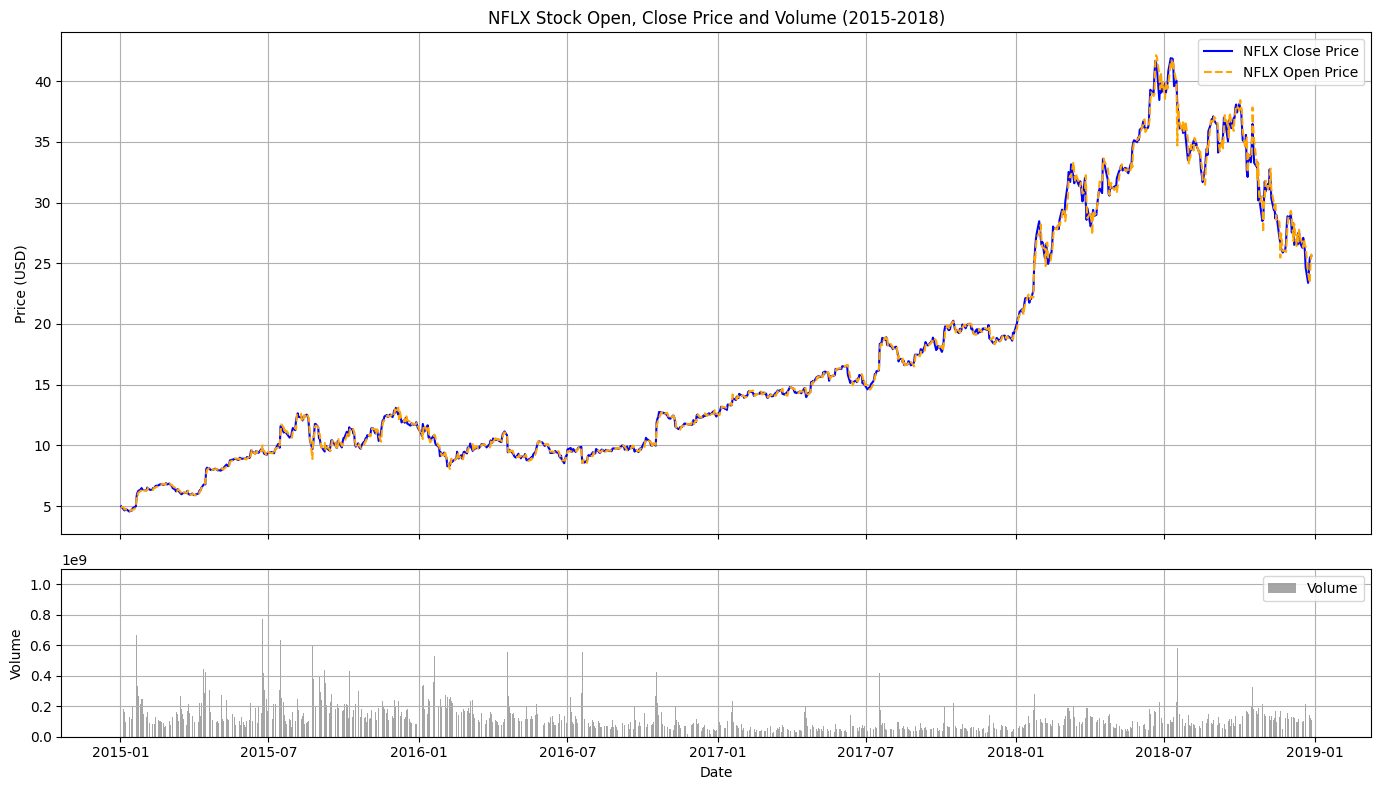

In [10]:
import matplotlib.pyplot as plt
import pandas as pd

# Create a figure with two subplots (one for price, one for volume)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 8), sharex=True, gridspec_kw={'height_ratios': [3, 1]})

# Plot Close and Open prices on the first subplot
ax1.plot(data_nflx.index, data_nflx['Close'], label='NFLX Close Price', color='blue')
ax1.plot(data_nflx.index, data_nflx['Open'], label='NFLX Open Price', color='orange', linestyle='--')
ax1.set_ylabel('Price (USD)')
ax1.set_title('NFLX Stock Open, Close Price and Volume (2015-2018)')
ax1.legend()
ax1.grid(True)

# Plot Volume on the second subplot
ax2.bar(data_nflx.index, data_nflx['Volume'].values.flatten(), label='Volume', color='grey', alpha=0.7, linewidth=0) # Flattened .values
ax2.set_xlabel('Date')
ax2.set_ylabel('Volume')
ax2.legend()
ax2.grid(True)

# Improve layout and display the plot
plt.tight_layout()
plt.show()

## 4. Conclusion

We saw a few examples in this notebook of how to gather data from (1) public data repository, (2) manual web scraping, and (3) data set API functions. There are actually a lot more things to cover just for this topic of data mining and what you just saw above are just a tip of the iceberg. But don't worry. As long as you understand the principles above, learning other tools/methods shouldn't be a big challenge, but just a little bit of investment of time to get to know all those commands and etc.

< [How to Read and Represent Data](../ica02/How_to_Read_and_Represent_Data.ipynb) | Contents (TODO) | [Data Preprocessing and Visualization](../ica04/Data_Preprocessing_and_Visualization.ipynb) >

<a href="https://colab.research.google.com/github/stephenbaek/bigdata/blob/master/in-class-assignments/ica03/Data_Mining.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>